In [50]:
import numpy as np
import matplotlib.pyplot as plt

# 2. Genauigkeit der AD-Wandlung 0-10V

In [51]:
daten = np.genfromtxt("./DatenAufgabe2.csv", skip_header=1, delimiter=",")
feinmess = daten[:,1]
multimeter_fehler = feinmess - daten[:, 2]
pico_fehler = feinmess - daten[:, 3]
ad_fehler = feinmess - daten[:, 4]

def dU(Umin, Umax, n):
    return (Umax - Umin) / n**2

def S(fehler_arr):
    n = fehler_arr.size
    return np.sqrt(1/(n-1) * np.sum(fehler_arr**2))

print("theoretischen Quantisierungsfehler:", dU(-10, 10, 11), "V")
print("Messfehler Multimeter:", S(multimeter_fehler))
print("Messfehler Picoscope:", S(pico_fehler))
print("Messfehler AD Wandler:", S(ad_fehler))

theoretischen Quantisierungsfehler: 0.1652892561983471 V
Messfehler Multimeter: 0.01048808848170117
Messfehler Picoscope: 0.040004166449674895
Messfehler AD Wandler: 0.006155395104206213


# 3. Genauigkeit der AD-Wandlung 0-5V

In [52]:
daten = np.genfromtxt("./DatenAufgabe3.csv", skip_header=1, delimiter=",")
feinmess = daten[:,1]
multimeter_fehler = feinmess - daten[:, 2]
pico_fehler = feinmess - daten[:, 3]
ad_fehler = feinmess - daten[:, 4]

def dU(Umin, Umax, n):
    return (Umax - Umin) / n**2

def S(fehler_arr):
    n = fehler_arr.size
    return np.sqrt(1/(n-1) * np.sum(fehler_arr**2))

print("theoretischen Quantisierungsfehler:", dU(0, 5, 10), "V")
print("Messfehler Multimeter:", S(multimeter_fehler))
print("Messfehler Picoscope:", S(pico_fehler))
print("Messfehler AD Wandler:", S(ad_fehler))

theoretischen Quantisierungsfehler: 0.05 V
Messfehler Multimeter: 0.012379418403140012
Messfehler Picoscope: 0.038773380043529905
Messfehler AD Wandler: 0.008418729120241351


# 4. Zeitverhalten der DA-Wandlung

Mit dem script

```py
import redlab as rl
import math
from time import sleep
import numpy as np
import matplotlib.pyplot as plt

rl.cbVIn(0,0,1)

print("Voltage Value: " + str(rl.cbVOut(0,0,101,3)))

sin_wave = 2.5 + np.sin(np.array(np.arange(0, 10000, 0.2)))

for i in range(0, sin_wave.size):
    sleep(1/100)
    #print(sin_wave[i])
    #print(math.sin(i))
    rl.cbVOut(0,0,101,sin_wave[i])

print("Voltage Value: " + str(rl.cbVOut(0,0,101,3)))
```

# 5. Abtasttheorem

Abgelesen mit dem Code

```py
import redlab as rl
import math
from time import sleep
import numpy as np
import matplotlib.pyplot as plt

space = np.array(np.floor(np.linspace(1500, 6000, num=7)), dtype=int)

redm = []

for s in space:
    print("measuring", s)
    input("warten")
    redm.append(rl.cbVInScan(0,0,0,1000,6000,1))
    
redm = np.array(redm)
print(redm.shape)
print("Messreihe: " + str(redm))


fig, ax = plt.subplots(7, figsize=(10, 30))

for i in range(0,7):
    ax[i].set_title("rate: " + str(space[i]))
    ax[i].plot(redm[i])

np.save("./redm_data", redm)
```

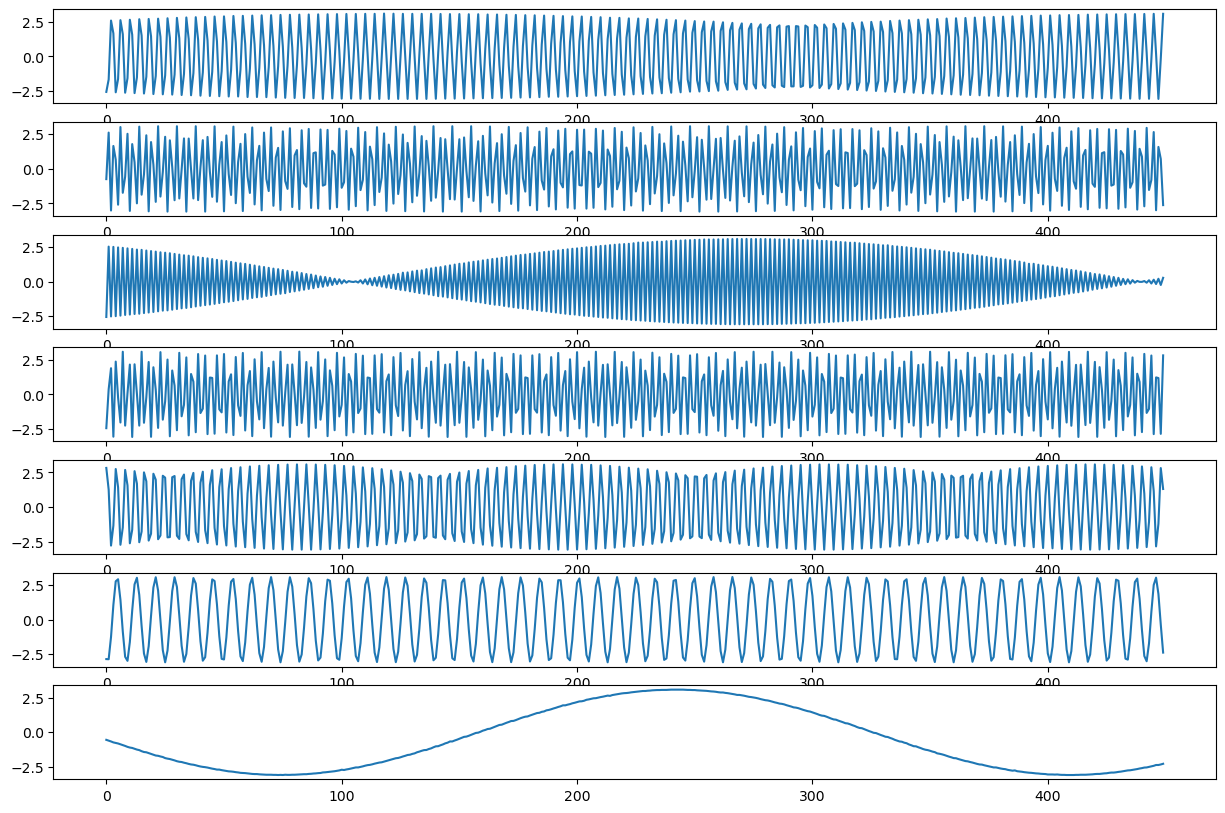

In [53]:
data = np.load("redm_data.npy")
data[2,:] = np.load("3000_redm.npy") # bessere einlesung von der 3. messung

fig, ax = plt.subplots(data.shape[0], figsize=(15, 10))
for i in range(0, data.shape[0]):
    ax[i].plot(data[i, 150:600])